Before start, we import pandas and read in the data file.

In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
df = pd.read_csv('NYC_Restaurants.csv', dtype=unicode)

Populating the interactive namespace from numpy and matplotlib


## Q1

For this question, I get the new "RESTARUANT" column by combining the content of three existing columns and adding space between each two of them.

In [2]:
df['RESTAURANT'] = df['DBA'] +" "+df['BUILDING']+" "+df['STREET']+\
" "+df['ZIPCODE']
df.ix[:9]

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,RESTAURANT
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection,WENDY'S 469 FLATBUSH AVENUE 11225
2,2,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,04H,"Raw, cooked or prepared food is adulterated, c...",Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225
3,3,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225
4,4,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,11/13/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,16,NaN,NaN,02/12/2015,Cycle Inspection / Initial Inspection,WENDY'S 469 FLATBUSH AVENUE 11225
5,5,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,02B,Hot food item not held at or above 140º F.,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
6,6,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06A,Personal cleanliness inadequate. Outer garment...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
7,7,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
8,8,40356068,TOV KOSHER KITCHEN,QUEENS,97-22,63 ROAD,11374,7188967788,Jewish/Kosher,11/24/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,20,Z,11/24/2014,02/12/2015,Cycle Inspection / Re-inspection,TOV KOSHER KITCHEN 97-22 63 ROAD 11374
9,9,40356151,BRUNOS ON THE BOULEVARD,QUEENS,8825,ASTORIA BOULEVARD,11369,7183350505,American,11/15/2014,Violations were cited in the following area(s).,04L,Evidence of mice or live mice present in facil...,Critical,38,Z,11/15/2014,02/12/2015,Cycle Inspection / Re-inspection,BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...


## Q2

Here as a unique restaruant is defined by its unique restaurant address, I decide to add a new column called "restaurant address" to show this information. Then I use set() function to get the unique value of this column and use len() to calculate the number of unique restaurant. 

In [3]:
df['RESTAURANT_ADDRESS'] = df['DBA'] +" "+df['BUILDING']+" "+df['STREET']+\
" "+df['ZIPCODE']+" "+df['BORO']
df.ix[:9]

len(set(df['RESTAURANT_ADDRESS']))

10114

## Q3

Here as we need to find the same restaurant name occurring in at least two different addresses, I first dropped duplicate with "RESTAURANT" as a subset in the original dataframe, to get a new dataframe with only unique restaurant. Then as every restaurant in the new dataframe has a unique address, if two or more than two of them are under the same DBA, then this DBA should represent a chain. I used this statement as a mask to select the chain and print out the length of all the chain restaurant.

In [4]:
unique_restaurant_df = df.drop_duplicates(subset ='RESTAURANT')
DBA_of_restaurant = unique_restaurant_df['DBA'].value_counts()

chain = DBA_of_restaurant[DBA_of_restaurant >= 2]
print len(chain)

368


## Q4

I just used the chain I got from Q3 to plot the graph.

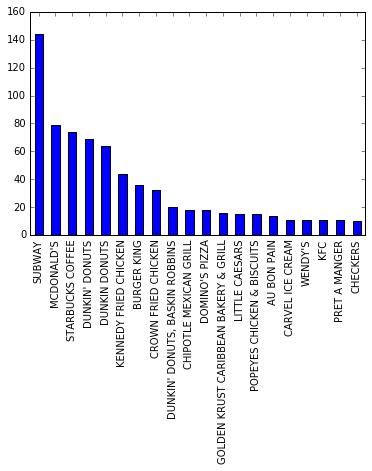

In [5]:
chain[:20].plot(kind='bar')

## Q5

To calculate the fraction of chain restaurant, I calculated the total number of chain restaurant and the total number of all the restaurant in NYU by calling the sum function. To make sure the result can be showed correctly as a decimal number, I use float to convert one of the sum numbers (here I converted the total number of all restaurant in NYU).

In [6]:
chain_fraction = chain.sum()/float(DBA_of_restaurant.sum())
chain_fraction

0.16472216729286138

## Q6

For this question we need to plot the number of non-chain restaurants in each
boro. I made a judgement call that based on the question description, here we should work on the dataframe that only contains unique restaurant.

To solve the problem, first I need to create a mask to filter out all the non-chain restaurant. To achieve this goal I defined a function called "check_non_chain", which aftering being called on the unique_restaurant_df['DBA'] using "map", will conduct a list search among every single item on the 'DBA' series and return "True" or "False" based on whether the DBA is a chain or non-chain restaurant. 

Another thing I did before plotting the graph is to remove all the missing Boro value by changing "missing" to NaN. I achieved this by using another mask which can filter out the "missing" boro.

The last step is just to plot the graph after using non-chain mask on the unique_restaurant_df and doing value_counts on the "Boro" column.

In [22]:
non_chain = DBA_of_restaurant[DBA_of_restaurant == 1]

def check_non_chain(n):
    return n in non_chain  #doing a list search, return particular true or false
mask_non_chain = unique_restaurant_df['DBA'].map(check_non_chain)

mask_missing = (unique_restaurant_df['BORO'] == 'Missing')
unique_restaurant_df.ix[mask_missing,'BORO'] = np.nan #set the value to NaN

unique_restaurant_df[mask_non_chain]['BORO'].value_counts().plot(kind='bar')

NIKKO HIBACHI STEAKHOUSE & LOUNGE         1
CLUB LIT                                  1
BELLE HARBOR YACHT CLUB                   1
MIHOKO'S 21 GRAMS                         1
DAMIAN COFFEE SHOP                        1
RED ROOM                                  1
CLUBS GYRO                                1
HANG LUNG RESTAURANT                      1
CASCADES CATERING HALL                    1
CAFE BIBA                                 1
DOUBLE DOWN SALOON                        1
SVETSARAH                                 1
SONNY'S ROTI SHOP                         1
FLAMING SADDLES SALOON                    1
BARRACA/MACONDO                           1
TASTY DUMPLING                            1
SPOLEM                                    1
DAVEY'S ICE CREAM                         1
AL DENTE PIZZERIA                         1
PETEY'S BURGER                            1
TEN DEGREES BISTRO                        1
KING PIZZA                                1
CHANCE                          

## Q7

Q7 required us to plot the fraction of non-chain restaurants in each boro. So basically we just need to divide the number of non-chain restaurants (which we get in Q6) by the total number of restaurants in the boro (which uses the same approch as Q6 except that we don't need to apply the non-chain mask and don't need to worry about the boro missing value as they have already been dropped in unique_restaurant_df).

We can actually find that the boro with the most independent restaurants(which is Manhattan) is not the one with the highest ratio of independent restaurants(which is Brooklyn).

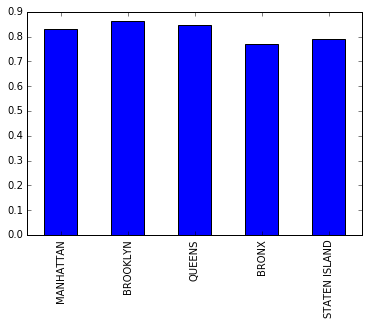

In [8]:
non_chain_fraction = unique_restaurant_df[mask_non_chain]['BORO'].value_counts()/unique_restaurant_df['BORO'].value_counts()
non_chain_fraction.plot(kind = 'bar')


## Q8

Here as the same restaurant can have multiple violations which can affect our final result if I just use the original df, I decided to work with the unique_restaurant_df in which all the duplicated restaurants have been removed. Then I selected the top 20 cuisines based on value count to plot the graph.

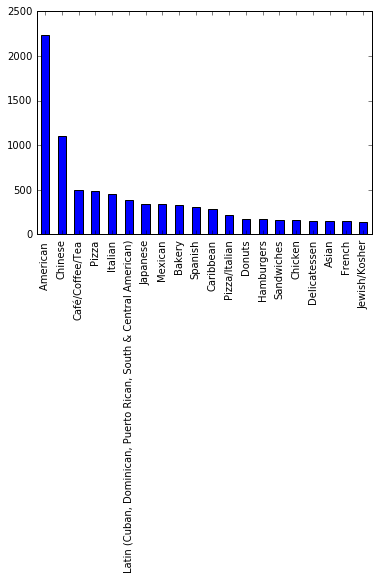

In [9]:
unique_restaurant_df['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

## Q9

At the beginning I plan to use the isnull() function on the unique restaurant dataframe directly to get the clean restaurant, then I realized if I do it this way, those restaurants that get both clean and violation record will just be treated as clean restaurant while they actually shouldn't be. Then I figured that I have to do it the opposite way--first find out all the restaurants that have a violation record, and the rest are clean restaurant. After getting the clean_restaurant_df, I also called the drop_duplicates function with subset equals to 'RESTAURANT' on the new df to get the unique restaurant list.

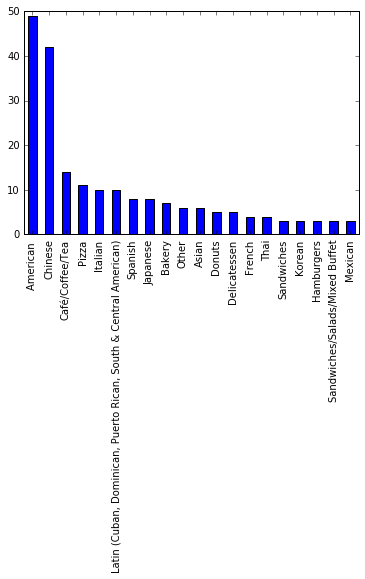

In [11]:
violation_notnull = df[df['VIOLATION CODE'].notnull()]
violation_restaurant = unique(violation_notnull['RESTAURANT'])

def clean_restaurant(n):
    if n in violation_restaurant:
        return False
    else:
        return True

mask_clean_restaurant = df['RESTAURANT'].map(clean_restaurant)
clean_restaurant_df = df[mask_clean_restaurant].drop_duplicates(subset = 'RESTAURANT')
clean_restaurant_df['CUISINE DESCRIPTION'].value_counts()[:20].plot(kind = 'bar')

## Q10

For Q10 we need to calculate the ratio of inspections where the violation code is missing (so the inspection passed) versus the total number of rows for that cuisine.

First of all, I used a mask to filter out cuisines that were represented in at least 20 restaurants and get a list of representing_cuisine. Then I defined a function to look through every cuisine description in unique_restaurant_df to check whether they are representing cuisine or not. Then I applied the mask_representing_cuisine on both the numerator and denominator to calculate the ratio.

In [12]:
cuisine = unique_restaurant_df['CUISINE DESCRIPTION'].value_counts()
representing_cuisine = cuisine[cuisine >= 20]

def check_representing_cuisine(n):
     return n in representing_cuisine  #doing a list search, return particular true or false

mask_representing_cuisine = unique_restaurant_df['CUISINE DESCRIPTION'].map(check_representing_cuisine)
ratio = clean_restaurant_df[mask_representing_cuisine]['CUISINE DESCRIPTION'].value_counts()/\
unique_restaurant_df[mask_representing_cuisine]['CUISINE DESCRIPTION'].value_counts()
ratio.sort_values(ascending=False)[:10]

C:\Users\rache\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Soul Food                        0.090909
Vietnamese/Cambodian/Malaysia    0.062500
Other                            0.058252
Soups & Sandwiches               0.047619
Continental                      0.047619
Barbecue                         0.047619
Asian                            0.041096
Chinese                          0.038251
Greek                            0.036364
Peruvian                         0.035714
Name: CUISINE DESCRIPTION, dtype: float64

## Q11

Here I used crosstab function to create the table of the number of times each violation description was observed in each borough. Then I used idxmax() function to figure out the most common violation description for each borough.

In [13]:
violations_in_boro = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'])
violations_in_boro.idxmax()

BORO
BRONX            Non-food contact surface improperly constructe...
BROOKLYN         Non-food contact surface improperly constructe...
MANHATTAN        Non-food contact surface improperly constructe...
Missing          Non-food contact surface improperly constructe...
QUEENS           Non-food contact surface improperly constructe...
STATEN ISLAND    Non-food contact surface improperly constructe...
dtype: object

## Q12

Actually there is one parameter related to normalization inside the crosstab function. Here we set normalize = 'index', so that everything inside the crosstab will be normalized over each row.

In [14]:
normalized_violations_in_boro = pd.crosstab(df['VIOLATION DESCRIPTION'], df['BORO'], normalize ='index')
normalized_violations_in_boro.idxmax()

BORO
BRONX                                  Unprotected food re-served.
BROOKLYN         Precooked potentially hazardous food from comm...
MANHATTAN        Out-of package sale of tobacco products observed.
Missing          ''''Wash hands sign not posted at hand wash f...
QUEENS           Caloric content range (minimum to maximum) not...
STATEN ISLAND    Eggs found dirty/cracked; liquid, frozen or po...
dtype: object

## Q13

First we need to add a new 'AREA CODE' column to the original df. To get the area code we need to extract the first 3 characters of the phone number. I defined a get_area_code function and map it on the original dataframe to achieve this.

After getting the area code, we get a new dataframe called groups_df with only area code and zipcode column for further analysis. To solve the unique match problem, I thought about groupby, and I try to group the data by area code and count for each area code how many different zipcodes are there. Then I used a mask to filter out those counts that equal to 1. But soon after I finish this, I realized that some of the counts are larger than 1 but the counts could actually come from the same zipcode. Therefore I went back to the groups_df and add a drop_duplicates function to slove this problem.

In [20]:
def get_area_code(s):
    return s[:3]
df['AREA CODE']=df['PHONE'].map(get_area_code)

groups_df = df[['AREA CODE','ZIPCODE']].drop_duplicates()
groups = groups_df.groupby('AREA CODE')[['ZIPCODE']].agg(['count'])

groups_mask = (groups['ZIPCODE']['count'] == 1)
groups[groups_mask].count()

ZIPCODE  count    34
dtype: int64

## Q14

For Q14 we first need to add the required columns in the original dataframe. Here I used map function to finish this task quickly. After getting the column we comnined the three new columns into a new dataframe called street_names_df and remove the duplicate and where street base is empty. Then I merged the street_names_df with itself on the STREET BASE & ZIP column and used mask to filiter out the rows where the street types are different. Finally I used crosstab and the idxmax function to solve the problem.

In [16]:
def get_street_type(s):
    return s.split()[-1]
df['STREET TYPE']=df['STREET'].map(get_street_type)

def get_street_base(s):
    return s.rsplit(' ', 1)[0]
df['STREET BASE']=df['STREET'].map(get_street_base)

df['STREET BASE & ZIP'] = df['STREET BASE']+df['ZIPCODE']

street_names_df = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]
street_names_df = street_names_df.dropna(subset=['STREET BASE']).drop_duplicates()

merged = pd.merge(street_names_df,street_names_df,
               on = 'STREET BASE & ZIP')

mask_unique_street_type = (merged['STREET TYPE_x']!=merged['STREET TYPE_y'])
merged[mask_unique_street_type]

cross_tabulation = pd.crosstab(merged[mask_unique_street_type]['STREET TYPE_x'], merged[mask_unique_street_type]['STREET TYPE_y'])

print "AVE:", cross_tabulation['AVE'].idxmax()
print "ST:",cross_tabulation['ST'].idxmax()
print "RD:",cross_tabulation['RD'].idxmax()
print "PL:",cross_tabulation['PL'].idxmax()
print "BOULEARD:",cross_tabulation['BOULEARD'].idxmax()
print "BULEVARD:",cross_tabulation['BULEVARD'].idxmax()


AVE: AVENUE
ST: STREET
RD: ROAD
PL: PLACE
BOULEARD: BLVD
BULEVARD: BLVD
